In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

In [3]:
dataFrame = pd.read_csv("./sampleData/CC GENERAL.csv")

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Data Inspection 

</div>

In [4]:
dataFrame.info()
dataFrame.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
dataFrame.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Data Cleaning

</div>

## Overview
- Replaced missing values with the mean value of that column.
- Verfied no duplicated rows existed in the dataset.
- Removed unneeded columns that didn't provide value to the clusterin.

From the above table, we can see that two columns the 'CREDIT_LIMIT' and the 'MINIMUM_PAYMENTS' columns are the only two in the data set to contain null values. Since we don't want any null values to sway our data, below I fill every null value with a new value. That new value I chose was the mean of the dataset for that column.

In [6]:
# Replaces the missing values with that of the mean of that column
dataFrame['CREDIT_LIMIT'] = dataFrame['CREDIT_LIMIT'].fillna(dataFrame['CREDIT_LIMIT'].mean())
dataFrame['MINIMUM_PAYMENTS'] = dataFrame['MINIMUM_PAYMENTS'].fillna(dataFrame['MINIMUM_PAYMENTS'].mean())

In [7]:
# Verfies if any duplicated rows exist inside the data
duplicatedEntries = dataFrame.duplicated().sum()
print(f"Number of Duplicated Entries: {duplicatedEntries}")

Number of Duplicated Entries: 0


In [8]:
# This is just a unique id per customer that wont assist us in the clustering process
dataFrame.drop(['CUST_ID'], axis=1, inplace=True)

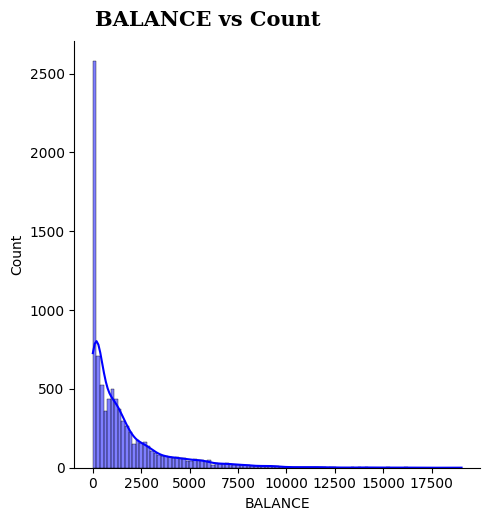

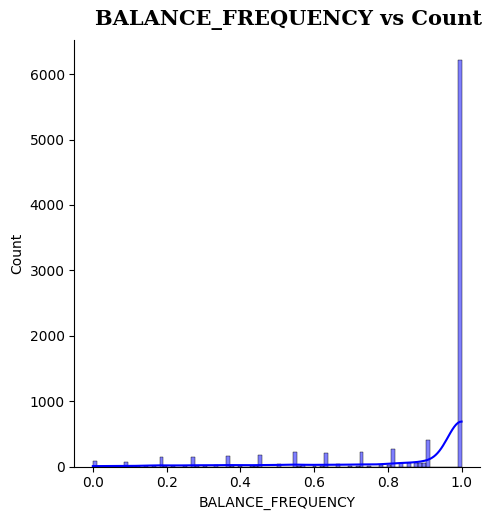

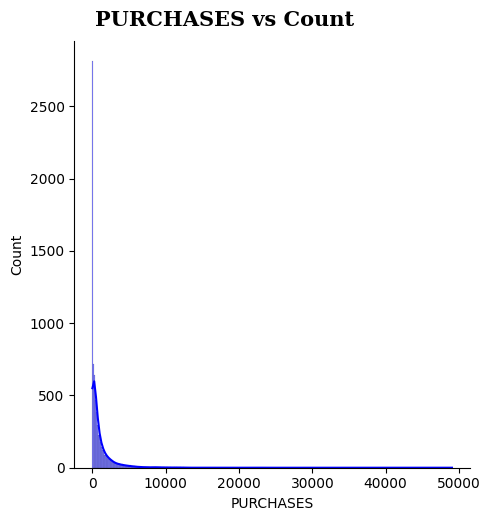

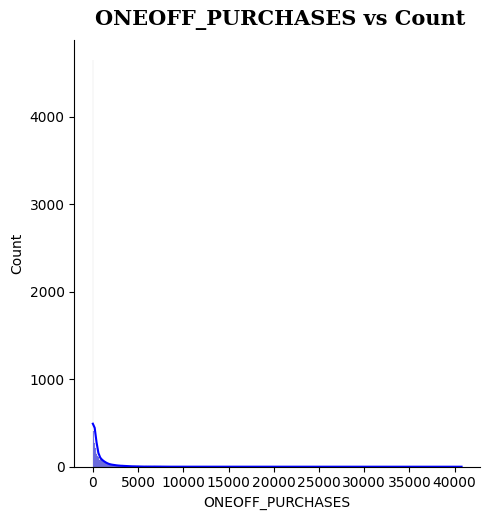

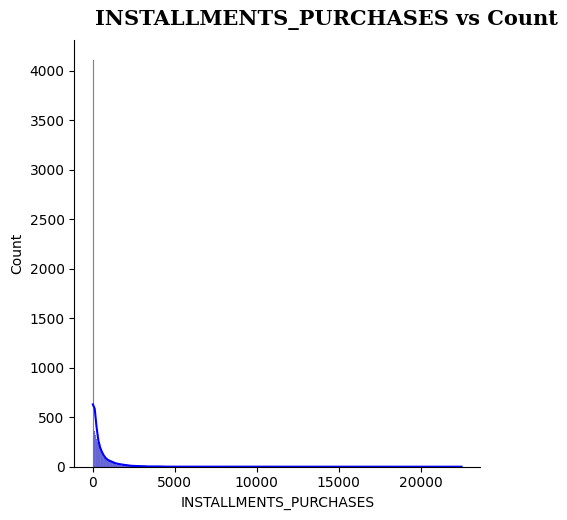

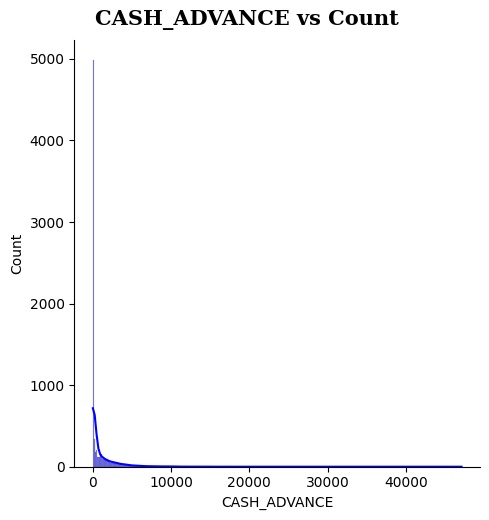

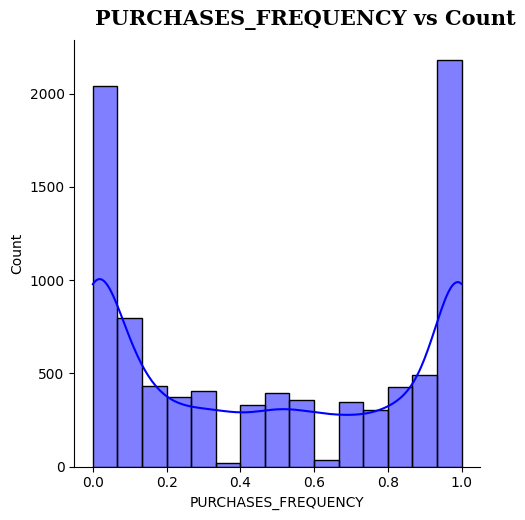

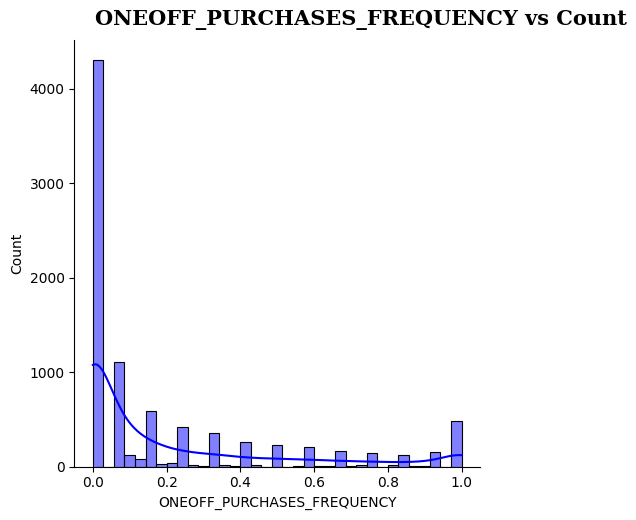

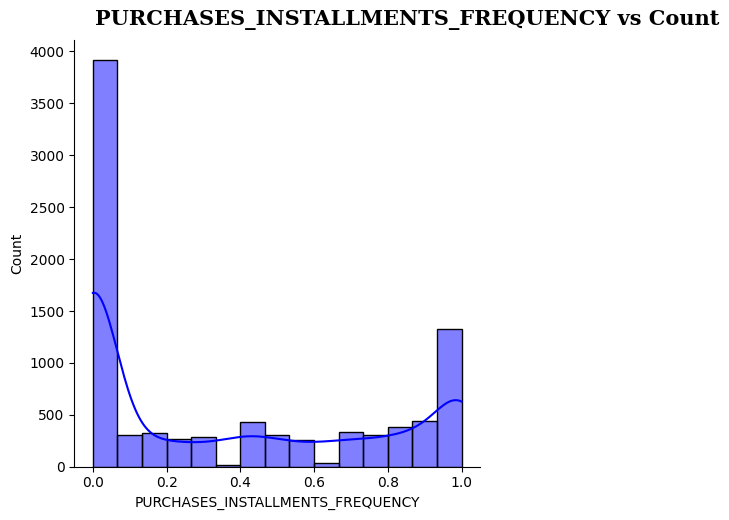

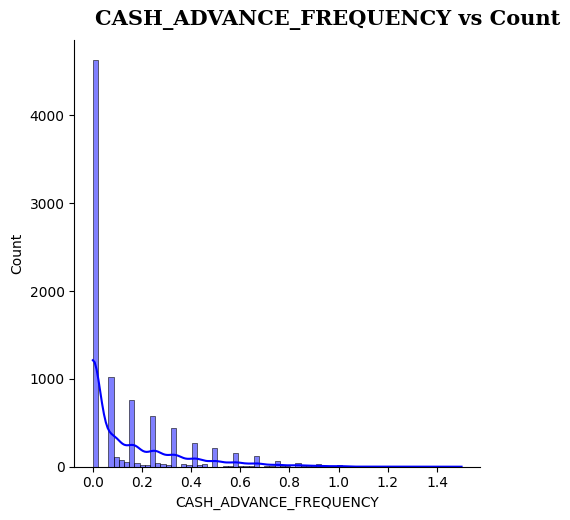

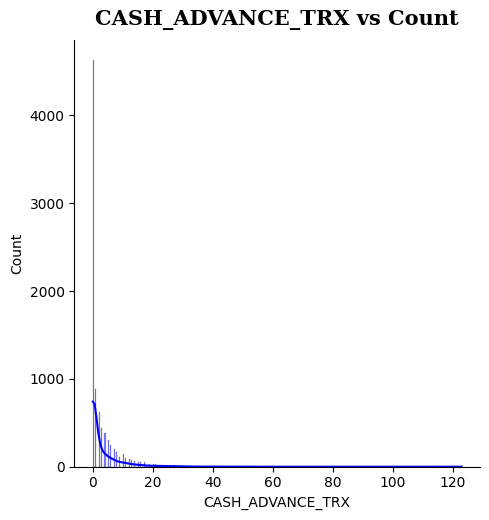

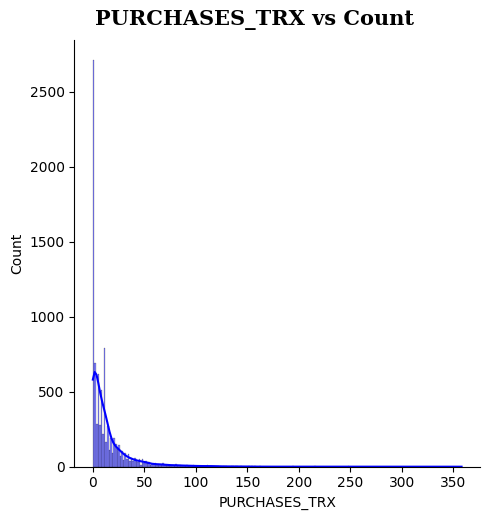

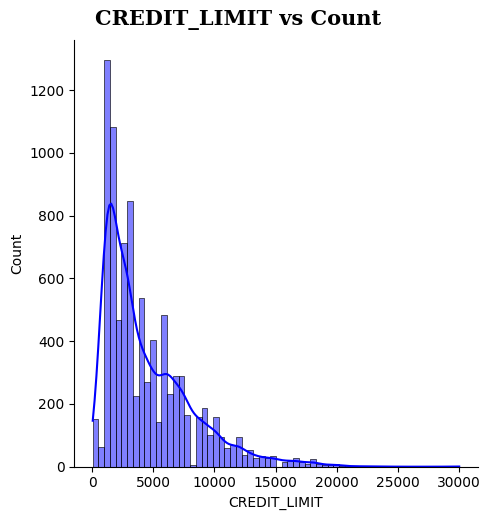

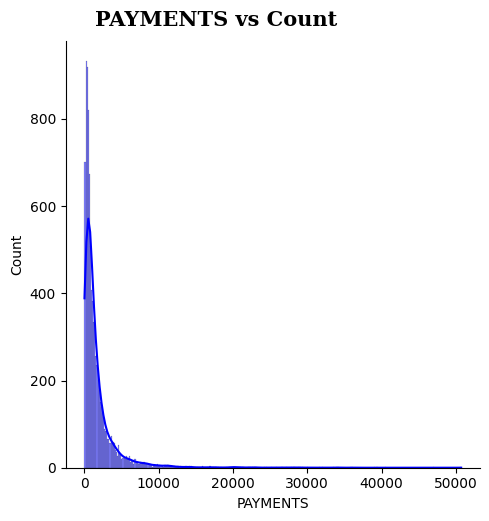

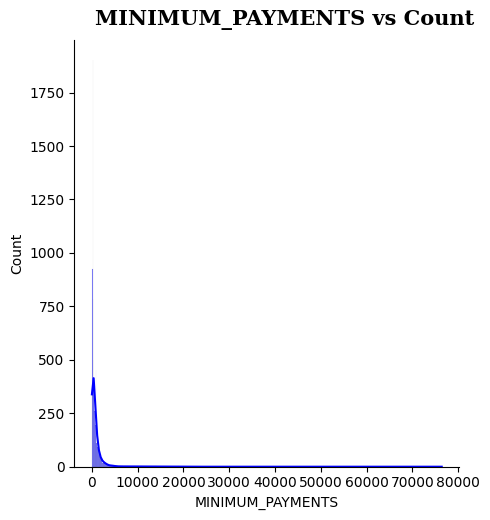

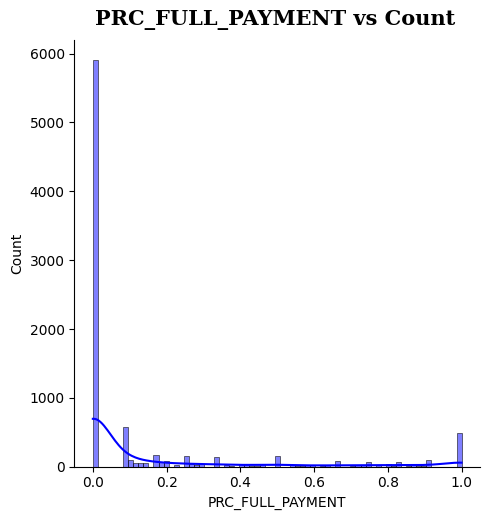

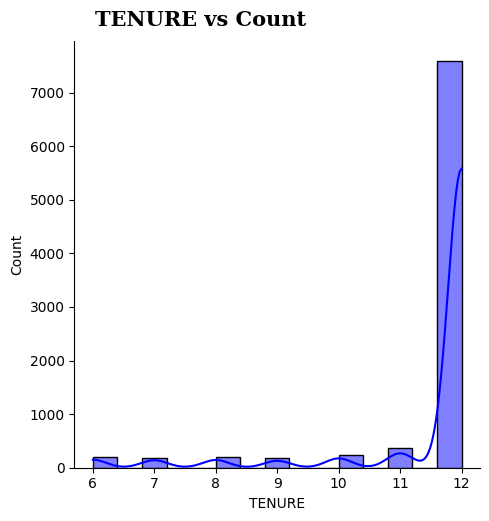

In [9]:
# Below is a list of all numerical features inside of the dataset
numericalFeatures = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Creates a distribution plot using Seaborn and then setsup chart characteristics.
def generateDistributionPlot(feature, graphColor):
    sns.displot(x = feature, data = dataFrame, kde = True, color = graphColor)
    plt.figtext(0.2, 1, '%s vs Count'%feature, fontfamily = 'serif', fontsize = 15, fontweight = 'bold')

# looking at the distribution of data
for feat in numericalFeatures:
    generateDistributionPlot(feat, "blue")

Add some comments here

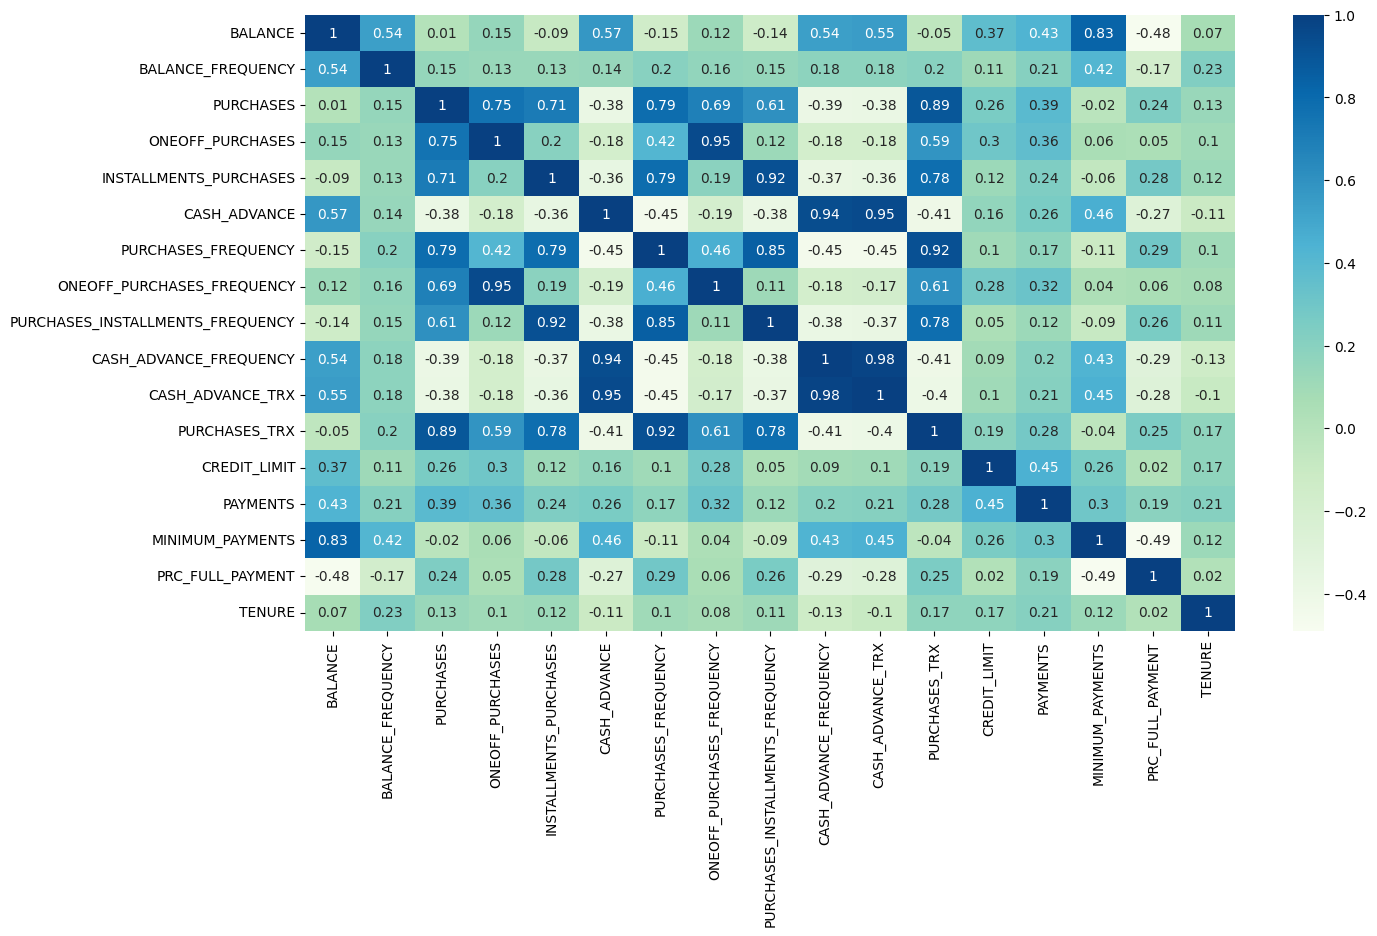

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(dataFrame[numericalFeatures].corr(method = 'spearman'), 2), 
            annot = True, mask = None, cmap = 'GnBu')
plt.show()

Explain matrix here

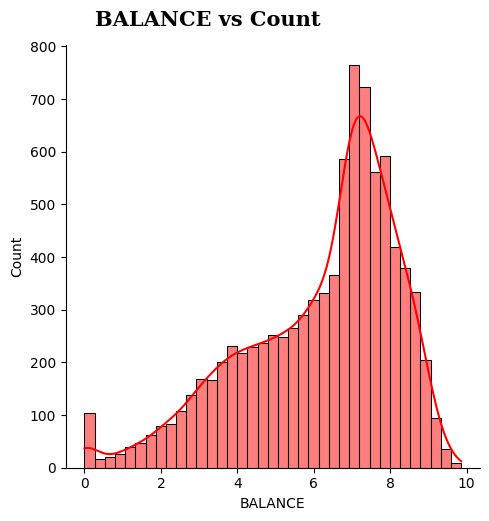

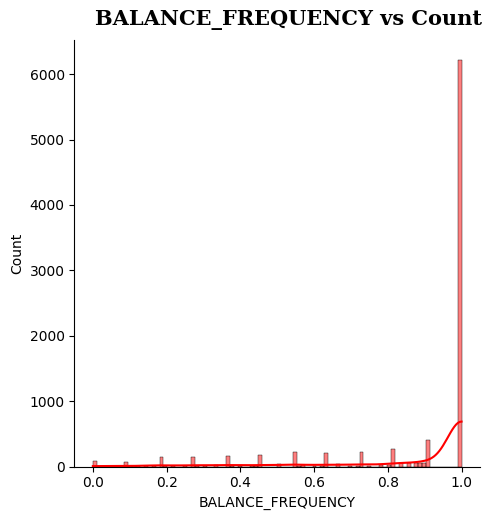

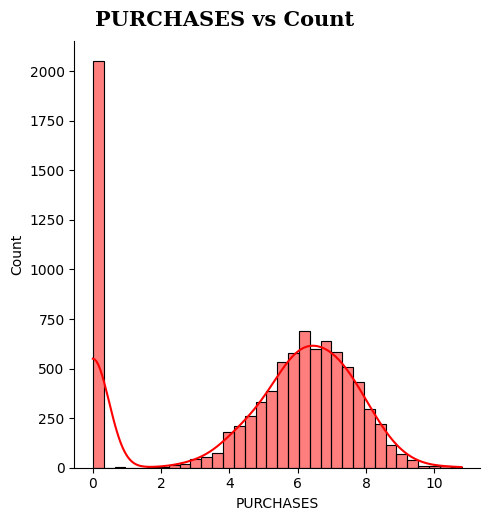

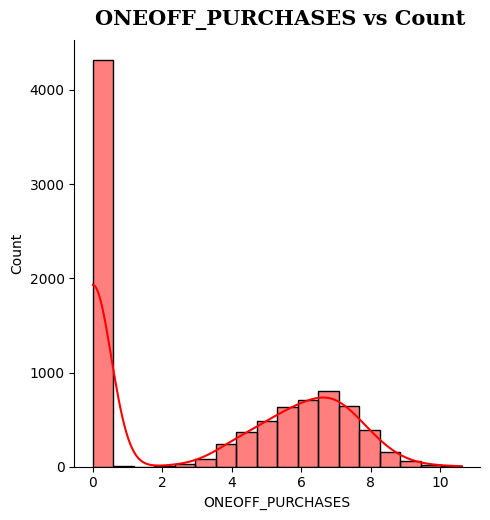

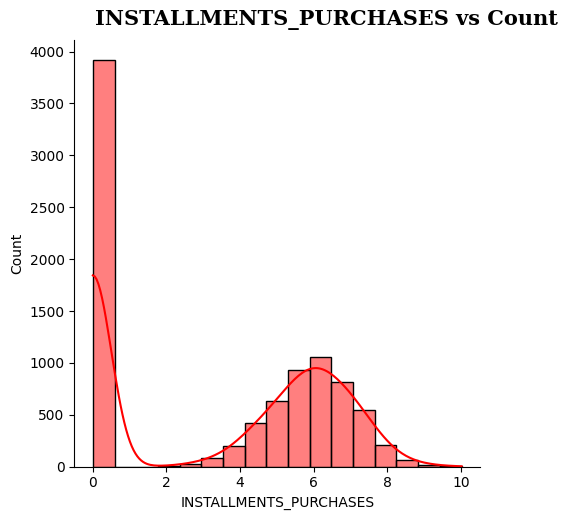

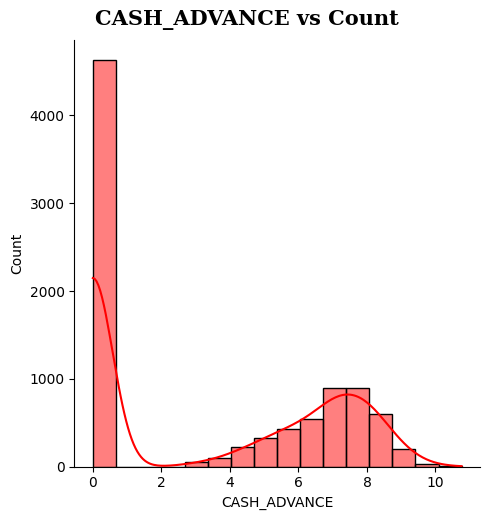

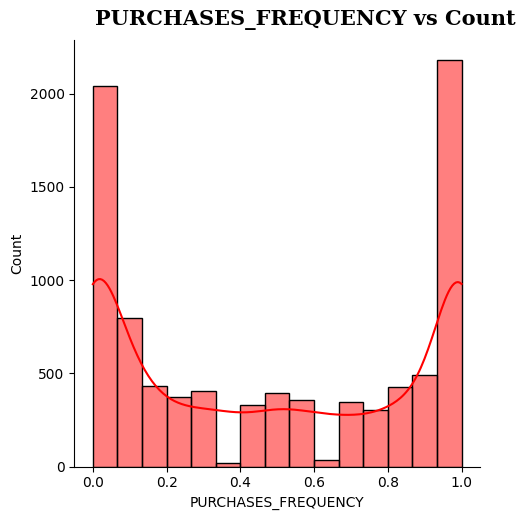

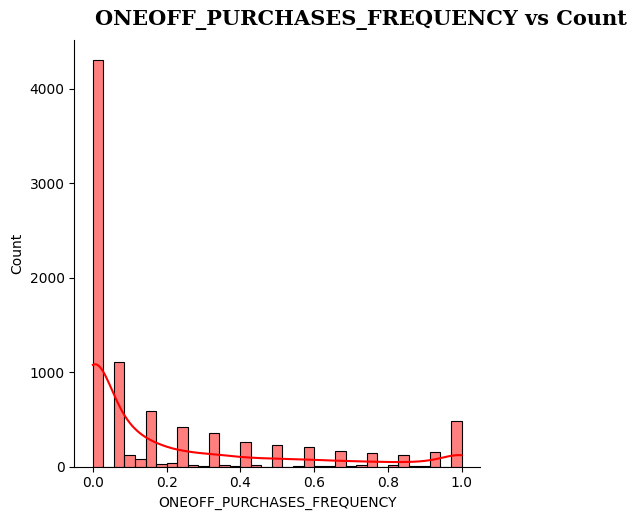

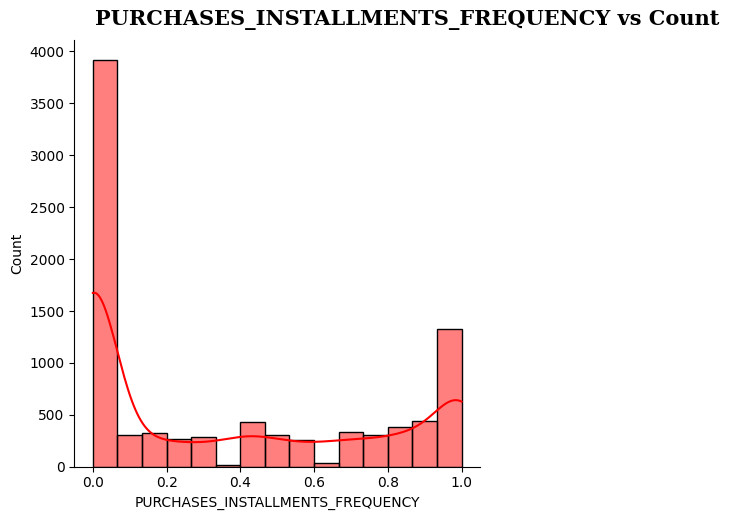

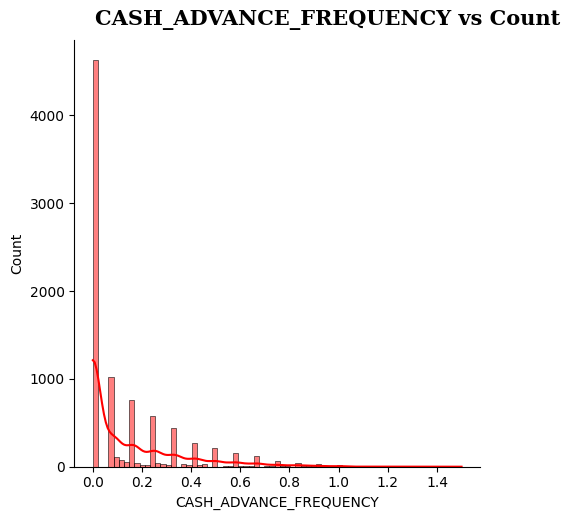

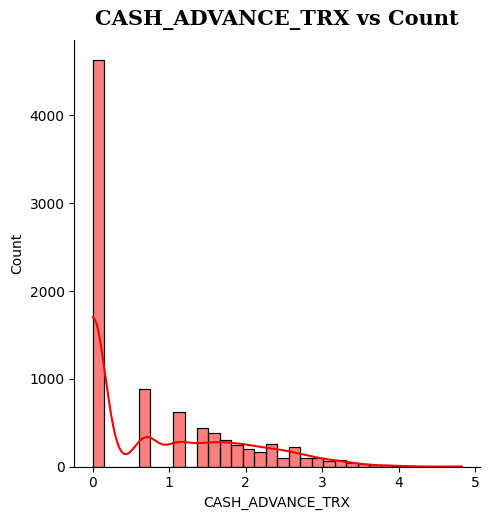

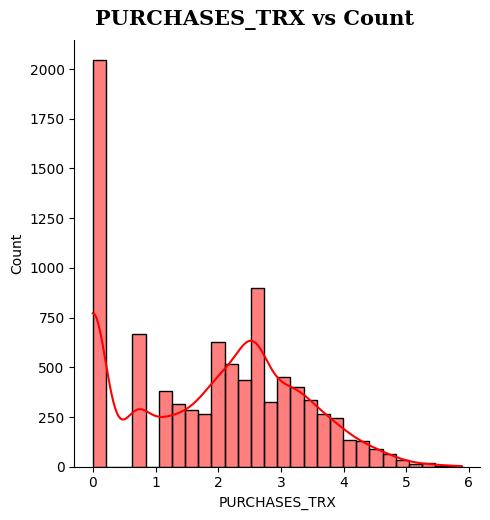

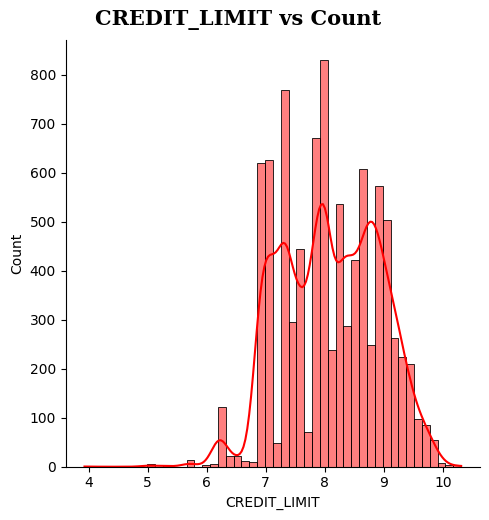

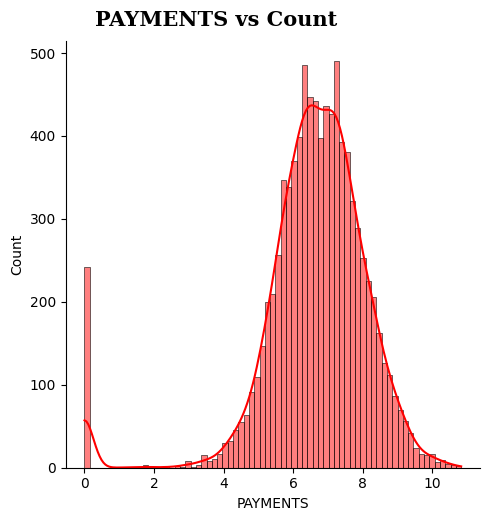

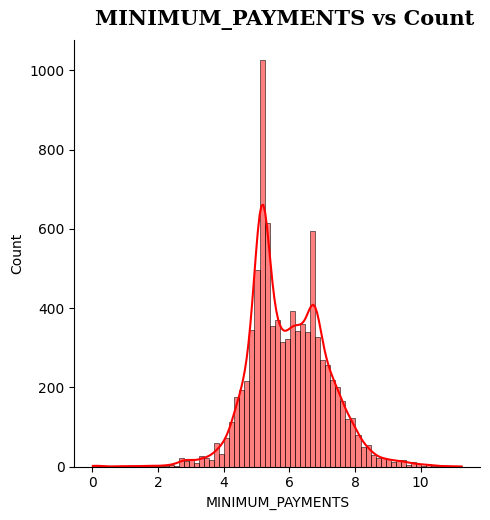

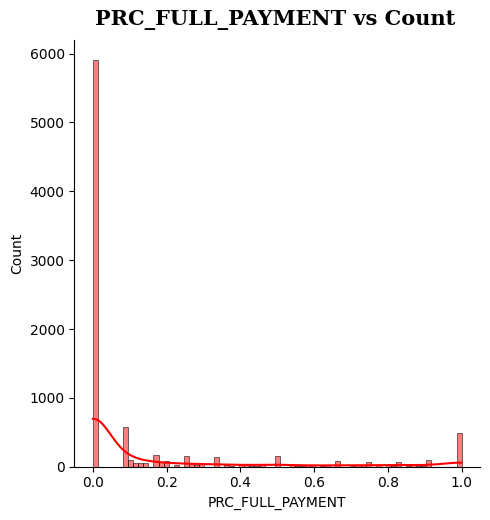

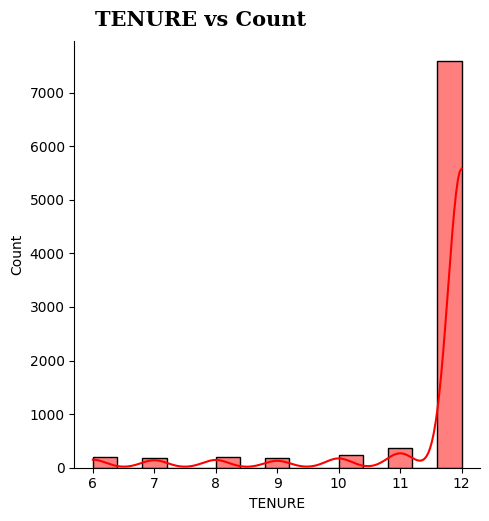

In [11]:
dataFrame = dataFrame.copy()
deviatedFeatures = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']

for feat in deviatedFeatures:
    dataFrame[feat] = np.log(1 + dataFrame[feat])

for feat in numericalFeatures:
    generateDistributionPlot(feat, "red")

Explain new graphs

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Optimal Cluster Number Using Elbow Method

</div>

In [12]:
scale = StandardScaler()
trainDataSet = scale.fit_transform(dataFrame)
trainDataSet.shape

(8950, 17)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

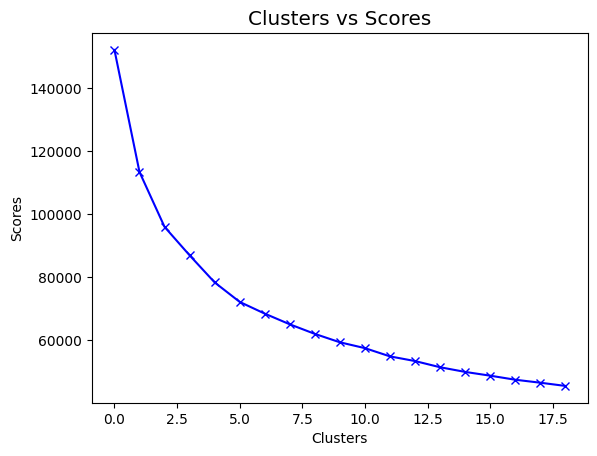

In [13]:
kMeansPrimaryScores = []

range_values = range(1,20)
for i in range_values:
    kMeansModel = KMeans(n_clusters = i)
    kMeansModel.fit(trainDataSet)
    kMeansPrimaryScores.append(kMeansModel.inertia_)
plt.plot(kMeansPrimaryScores, 'bx-')
plt.style.use('ggplot')
plt.title('Clusters vs Scores')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Explain Graph

<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# K-Means

</div>

In [14]:
kMeansModel = KMeans(8)
kMeansModel.fit(trainDataSet)
labels = kMeansModel.labels_
kMeansModel.cluster_centers_.shape

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(8, 17)

In [15]:
centerClusters = pd.DataFrame(data = kMeansModel.cluster_centers_,columns = [dataFrame.columns])
centerClusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.172558,0.414206,0.484578,-0.358154,0.897641,-0.553185,0.774159,-0.444281,0.994623,-0.535777,-0.568361,0.596427,-0.462720,-0.082453,0.255320,-0.432866,0.258840
1,0.592296,0.268939,-1.474966,-0.842653,-1.043470,1.010366,-1.182001,-0.643477,-0.905596,0.730568,0.907352,-1.288590,-0.036710,0.123621,0.402452,-0.421122,0.230708
2,-1.787235,-2.351556,-0.150573,-0.263586,-0.275759,-0.642523,-0.594522,-0.448295,-0.475540,-0.586776,-0.644612,-0.463133,-0.237036,-0.983654,-0.894497,0.069175,0.084396
3,0.159692,0.273033,0.353087,0.746857,-0.679205,-0.530146,-0.438401,0.220832,-0.784005,-0.510517,-0.550922,-0.135302,-0.159179,-0.228804,-0.038447,-0.373843,0.214480
4,0.071970,-0.364112,-0.725127,-0.360507,-0.733827,0.841086,-0.658989,-0.326070,-0.628024,0.827202,0.648320,-0.791285,-0.574211,-0.734161,-0.343870,-0.309268,-3.269035
5,0.886779,0.428690,0.652033,0.656825,0.466267,1.213551,0.485721,0.410063,0.331310,1.291894,1.384485,0.662500,0.595249,0.647112,0.894110,-0.391053,0.152955
6,0.179991,0.408974,1.007845,1.287151,0.757751,-0.716959,1.093039,1.783766,0.654437,-0.597202,-0.684847,1.257922,0.721045,0.673499,-0.104538,0.581801,0.272135
7,-1.174674,-0.089635,0.437777,-0.659865,0.886031,-0.899739,0.843641,-0.562631,1.016890,-0.663413,-0.792211,0.472135,-0.268700,-0.236494,-0.935083,1.520728,-0.235343


In [16]:
centerClusters = scale.inverse_transform(centerClusters)
centerClusters = pd.DataFrame(data = centerClusters, columns = [dataFrame.columns])
centerClusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.509030,0.975392,6.313019,2.041639,6.119652,1.346373,0.801058,0.069920,0.759726,0.027930,0.243946,2.714091,7.715629,6.493302,6.252768,0.027109,11.863712
1,7.354041,0.940980,0.597600,0.468867,0.135593,6.922150,0.015957,0.010496,0.004530,0.281338,1.733324,0.124492,8.064783,6.821305,6.426322,0.030544,11.826065
2,2.563594,0.320209,4.460470,2.348626,2.502292,1.027784,0.251740,0.068723,0.175446,0.017724,0.166989,1.258488,7.900598,5.058883,4.896469,0.173947,11.630262
3,6.483128,0.941950,5.929498,5.628708,1.258550,1.428534,0.314399,0.268336,0.052854,0.032985,0.261546,1.708856,7.964408,6.260359,5.906248,0.044372,11.804348
4,6.306526,0.791016,2.784664,2.034001,1.090162,6.318482,0.225866,0.105185,0.114845,0.300676,1.471893,0.807679,7.624252,5.455995,5.545977,0.063259,7.142512
5,7.946893,0.978823,6.801439,5.336448,4.789813,7.646728,0.685294,0.324787,0.496108,0.393665,2.214875,2.804860,8.582730,7.654532,7.006272,0.039338,11.722011
6,6.523993,0.974153,7.839237,7.382603,5.688400,0.762340,0.929040,0.734590,0.624528,0.015638,0.126381,3.622838,8.685831,7.696531,5.828288,0.323882,11.881505
7,3.796794,0.856037,6.176515,1.062232,6.083860,0.110528,0.828944,0.034614,0.768576,0.002388,0.018023,2.543341,7.874646,6.248119,4.848595,0.598501,11.202369


In [17]:
print(f"Labels Max: {labels.max()}")
print(f"Labels Min: {labels.min()}")
print(f"Labels Shape: {labels.shape}")

kMeansPredictor = kMeansModel.fit_predict(trainDataSet)
print(f"K Means Predictor: {kMeansPredictor}")

Labels Max: 7
Labels Min: 0
Labels Shape: (8950,)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K Means Predictor: [2 4 1 ... 6 6 6]


In [18]:
creditCardCluster = pd.concat([dataFrame, pd.DataFrame({'cluster': labels})], axis = 1)
creditCardCluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,2
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12,1
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,6
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12,3
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,3
5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,12,0
6,6.442955,1.000000,8.866724,8.764620,6.535793,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.174387,9.510519,8.757047,5.293636,1.000000,12,6
7,7.509145,1.000000,6.080391,0.000000,6.080391,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.564949,7.741099,6.522189,6.278585,0.000000,12,0
8,6.923556,1.000000,6.759824,6.496005,5.303305,0.000000,0.333333,0.083333,0.250000,0.000000,0.000000,1.791759,8.853808,6.535645,5.746086,0.000000,12,3
9,5.031914,0.545455,7.156645,7.156645,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,1.386294,9.305741,7.061138,4.618109,0.000000,12,3


<div style="background-color: #add8e6; padding: 10px; color: black; padding-top: 2rem; padding-left: 1rem">

# Principal Component Analysis

</div>

In [19]:
pcaModel = PCA(n_components=2)
pcaTransform = pcaModel.fit_transform(trainDataSet)
pcaDataFrame = pd.DataFrame(data = pcaTransform, columns = ['Analysis #1', 'Analysis #2'])
pcaDataFrame.sample(5)

,Analysis #1,Analysis #2
2718,1.523712,1.543124
5956,-1.600771,0.512784
2250,1.232370,0.912061
3338,0.496953,0.807432
5917,-2.073550,0.307745


In [20]:
pcaDataFrame = pd.concat([pcaDataFrame,pd.DataFrame({'cluster': labels})], axis = 1)
pcaDataFrame.head(10)

,Analysis #1,Analysis #2,cluster
0,-0.311022,-2.694133,2
1,-3.417320,1.034282,1
2,1.551226,1.309724,6
3,-1.371171,-0.842858,3
4,-1.168321,-1.348896,3
5,1.113120,0.310889,0
6,4.799997,1.643985,6
7,1.707789,-0.050190,0
8,0.925263,0.104737,3
9,0.262593,-1.168883,3


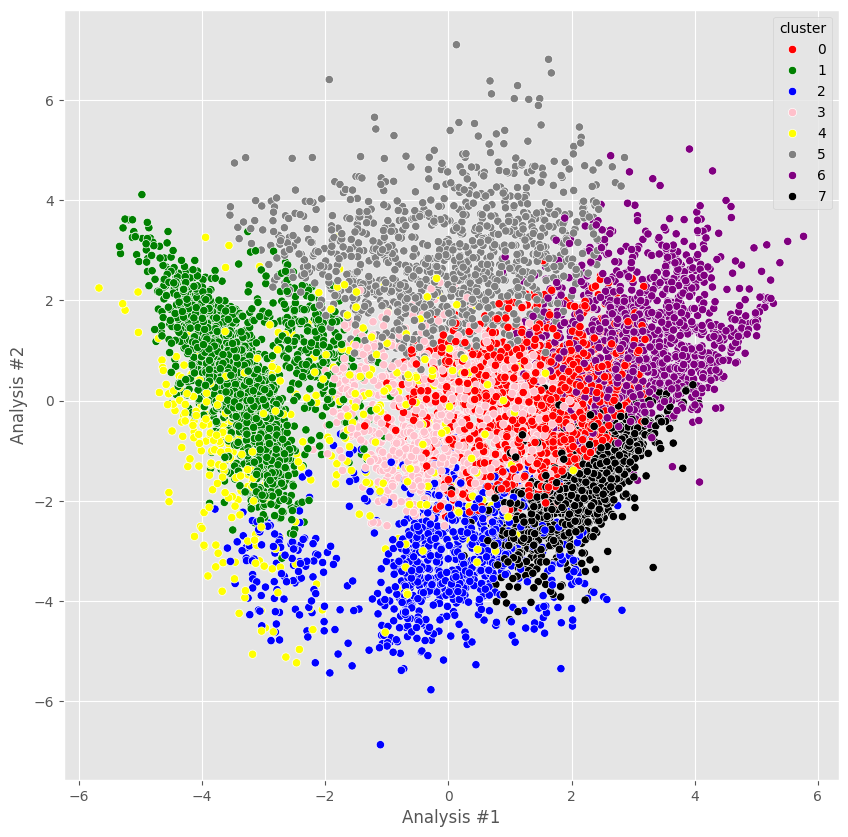

In [21]:
plt.figure(figsize = (10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x = "Analysis #1", y = "Analysis #2", hue = "cluster", data = pcaDataFrame, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [22]:
encoding_dim = 7
input_dataFrame = Input(shape=(17,))
x = Dense(encoding_dim, activation='relu')(input_dataFrame)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)
autoencoder = Model(input_dataFrame, decoded)
encoder = Model(input_dataFrame, encoded)
autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')
print(f"Shape of trainDataSet: {trainDataSet.shape}")
autoencoder.fit(trainDataSet, trainDataSet, batch_size = 128, epochs = 25, verbose = 1)

Shape of trainDataSet: (8950, 17)
Epoch 1/25
70/70 [==============================] - 1s 7ms/step - loss: 0.6192
Epoch 2/25
70/70 [==============================] - 1s 7ms/step - loss: 0.4145
Epoch 3/25
70/70 [==============================] - 1s 8ms/step - loss: 0.3735
Epoch 4/25
70/70 [==============================] - 1s 8ms/step - loss: 0.3449
Epoch 5/25
70/70 [==============================] - 1s 8ms/step - loss: 0.3314
Epoch 6/25
70/70 [==============================] - 1s 8ms/step - loss: 0.3218
Epoch 7/25
70/70 [==============================] - 1s 8ms/step - loss: 0.3094
Epoch 8/25
70/70 [==============================] - 1s 8ms/step - loss: 0.3016
Epoch 9/25
70/70 [==============================] - 1s 8ms/step - loss: 0.2888
Epoch 10/25
70/70 [==============================] - 1s 8ms/step - loss: 0.2765
Epoch 11/25
70/70 [==============================] - 1s 8ms/step - loss: 0.2700
Epoch 12/25
70/70 [==============================] - 1s 8ms/step - loss: 0.2653
Epoch 13/25
70/

In [23]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [24]:
encoderPrediction = encoder.predict(trainDataSet)
print(f"Shape: {encoderPrediction.shape}")

280/280 [==============================] - 0s 1ms/step
Shape: (8950, 10)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

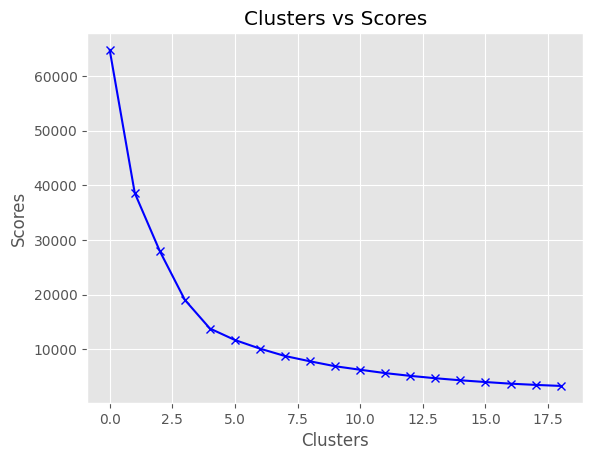

In [25]:
kMeansSecondaryScores = []

range_values = range(1, 20)
for i in range_values:
    kMeansModel = KMeans(n_clusters = i)
    kMeansModel.fit(encoderPrediction)
    kMeansSecondaryScores.append(kMeansModel.inertia_)
plt.plot(kMeansSecondaryScores, 'bx-')
plt.title('Clusters vs Scores')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.style.use('ggplot')
plt.show()

/var/folders/nj/3ny6cnc90sxb45v1_x38_fh00000gn/T/ipykernel_9720/3374471550.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(kMeansPrimaryScores, 'bx-', color = 'r',label = 'Without Autoencode')
/var/folders/nj/3ny6cnc90sxb45v1_x38_fh00000gn/T/ipykernel_9720/3374471550.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(kMeansSecondaryScores, 'bx-', color = 'g',label = 'With Autoencode')


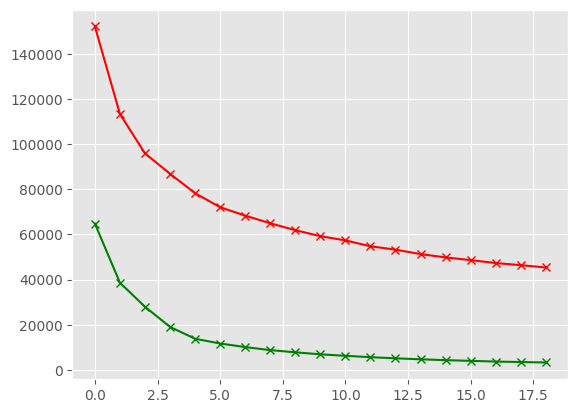

In [26]:
plt.plot(kMeansPrimaryScores, 'bx-', color = 'r',label = 'Without Autoencode')
plt.plot(kMeansSecondaryScores, 'bx-', color = 'g',label = 'With Autoencode')

In [27]:
kMeansModel = KMeans(4)
kMeansModel.fit(encoderPrediction)
labels = kMeansModel.labels_
kMeansPredictor = kMeansModel.fit_predict(trainDataSet)
print(f"Kmeans Cluster Shape: {kMeansModel.cluster_centers_.shape}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Kmeans Cluster Shape: (4, 17)


In [28]:
enhancedCreditCardCluster = pd.concat([dataFrame, pd.DataFrame({'cluster': labels})], axis = 1)
enhancedCreditCardCluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,3
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12,3
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,1
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12,3
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,1
5,7.501540,1.000000,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,12,1
6,6.442955,1.000000,8.866724,8.764620,6.535793,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.174387,9.510519,8.757047,5.293636,1.000000,12,1
7,7.509145,1.000000,6.080391,0.000000,6.080391,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.564949,7.741099,6.522189,6.278585,0.000000,12,1
8,6.923556,1.000000,6.759824,6.496005,5.303305,0.000000,0.333333,0.083333,0.250000,0.000000,0.000000,1.791759,8.853808,6.535645,5.746086,0.000000,12,1
9,5.031914,0.545455,7.156645,7.156645,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,1.386294,9.305741,7.061138,4.618109,0.000000,12,3


In [29]:
pcaModel = PCA(n_components = 2)
pcaTransform_new = pcaModel.fit_transform(encoderPrediction)
pcaDataFrame = pd.DataFrame(data = pcaTransform_new, columns = ['Analysis #1', 'Analysis #2'])
pcaDataFrame.sample(10)

,Analysis #1,Analysis #2
4071,-0.930894,-0.434947
1520,-0.809093,2.329673
8304,-0.625202,-0.491715
5190,0.393172,1.977928
7717,-0.785573,-0.526208
5254,-1.390570,-0.807024
7301,-0.174514,1.887101
7086,-1.660195,-0.930461
5269,0.296319,-1.253249
8385,-1.155740,0.355504


In [30]:
pcaDataFrame = pd.concat([pcaDataFrame, pd.DataFrame({'cluster': labels})], axis = 1)
pcaDataFrame.head(10)

,Analysis #1,Analysis #2,cluster
0,0.582339,-0.824105,3
1,0.189794,-1.771105,3
2,-1.699305,-0.032555,1
3,0.093692,-0.580670,3
4,-0.643211,-0.562498,1
5,-1.136828,1.621176,1
6,-1.440399,0.418644,1
7,-0.880677,1.599292,1
8,-1.098472,-0.348928,1
9,0.544550,0.215268,3


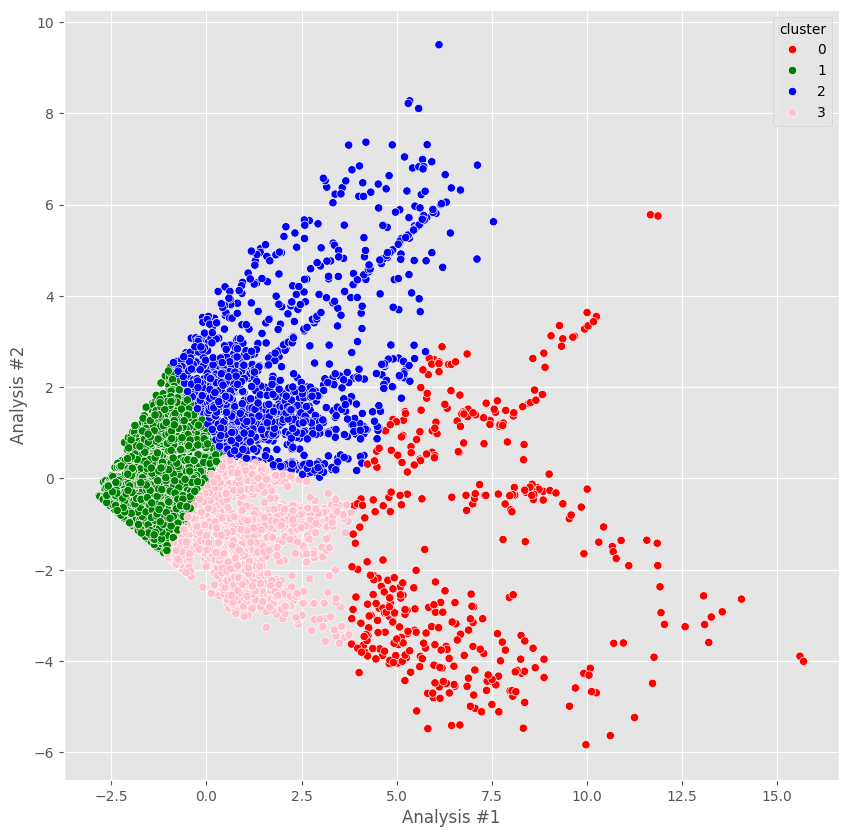

In [31]:
plt.figure(figsize = (10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x = "Analysis #1", y = "Analysis #2", hue = "cluster", data = pcaDataFrame, palette =['red','green','blue','pink'])
plt.show()

Conclusion